In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
df = pd.read_csv("insurance.csv") # csv dosyasından veri setini okuyoruz

In [ ]:
df.head() # veri setinin ilk 5 satırını gösteriyoruz

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5, 1.0, 'Distribution of Age')

<Figure size 864x288 with 0 Axes>

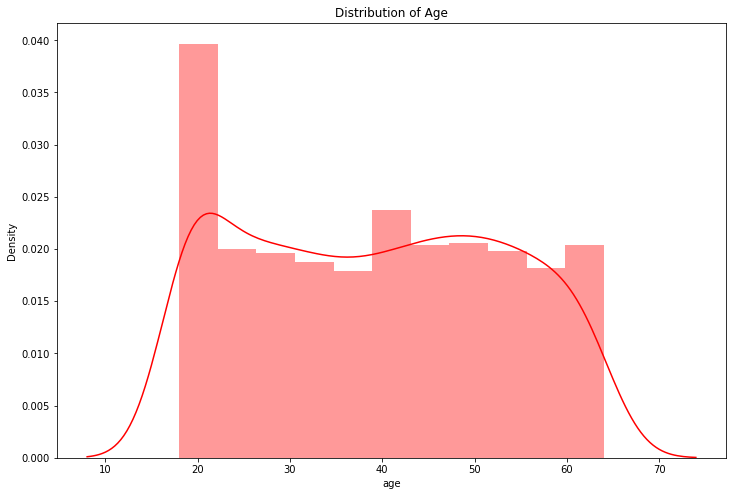

In [ ]:
f= plt.figure(figsize=(12,4)) # grafik boyutunu ayarlıyoruz : 12x4
f, ax = plt.subplots(1,1, figsize=(12, 8)) # grafik boyutunu ayarlıyoruz : 1 satır 1 sütun
ax = sns.distplot(df['age'], kde = True, color = 'r') # veri setindeki age kolonunu histogram olarak gösteriyoruz
plt.title('Distribution of Age') # grafiğin başlığını belirliyoruz

Text(0.5, 1.0, 'Distribution of Insurance Charges')

<Figure size 864x288 with 0 Axes>

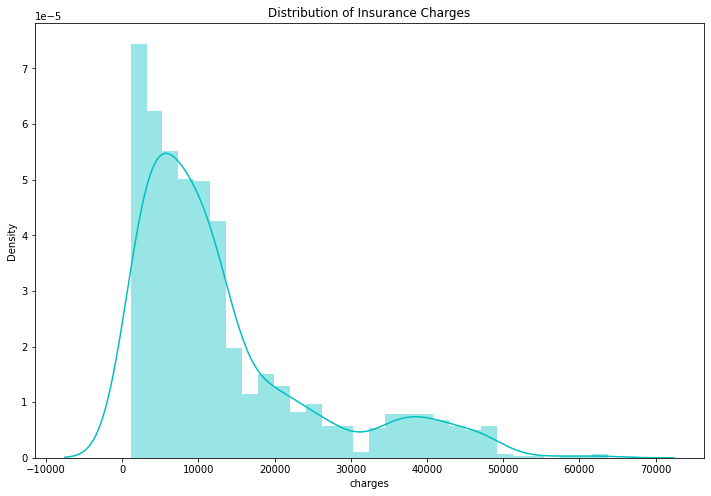

In [ ]:
f= plt.figure(figsize=(12,4)) #  12x4
f, ax = plt.subplots(1,1, figsize=(12, 8)) #  1 satır 1 sütun 12x8
ax = sns.distplot(df['charges'], kde = True, color = 'c') # veri setindeki charges kolonunu histogram olarak gösteriyoruz kde = kernel density estimation : kernel fonksiyonunu kullanarak histogramının kalınlığını ayarlıyoruz
plt.title('Distribution of Insurance Charges') 

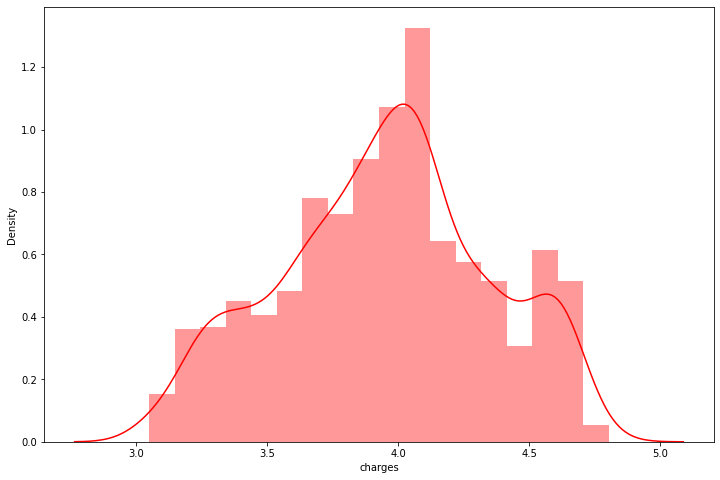

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))    
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' ) # veri setindeki charges kolonunu histogram olarak gösteriyoruz 

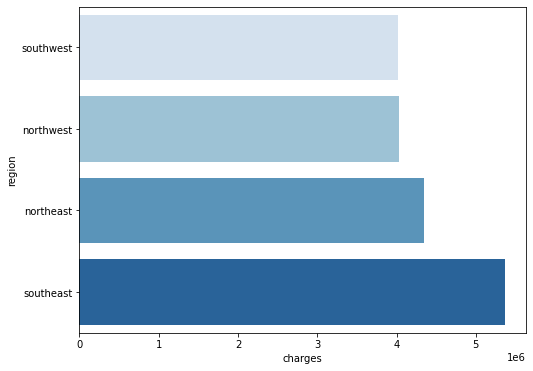

In [ ]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True) # veri setindeki charges kolonunu region kolonuna göre gruplandırıyoruz ve toplamlarını alıyoruz, sıralıyoruz ve yukarıya doğru sıralıyoruz
f, ax = plt.subplots(1, 1, figsize=(8, 6))   
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues') # charges kolonunu bar grafiği olarak gösteriyoruz

Yani Güneydoğu en yüksek tıbbi masrafa sahipken, Güneybatı en düşük tıbbi masrafa sahip.

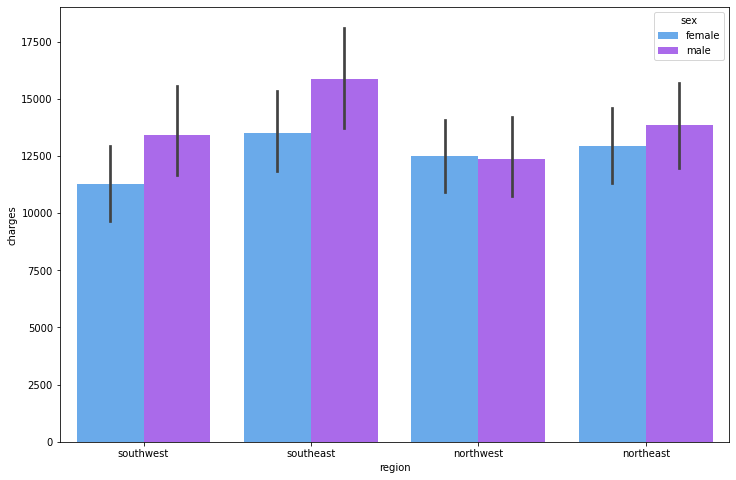

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))  
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')  

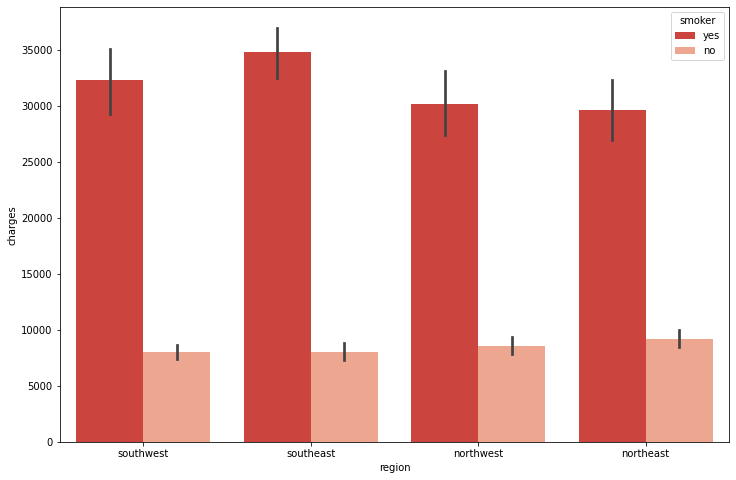

In [ ]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

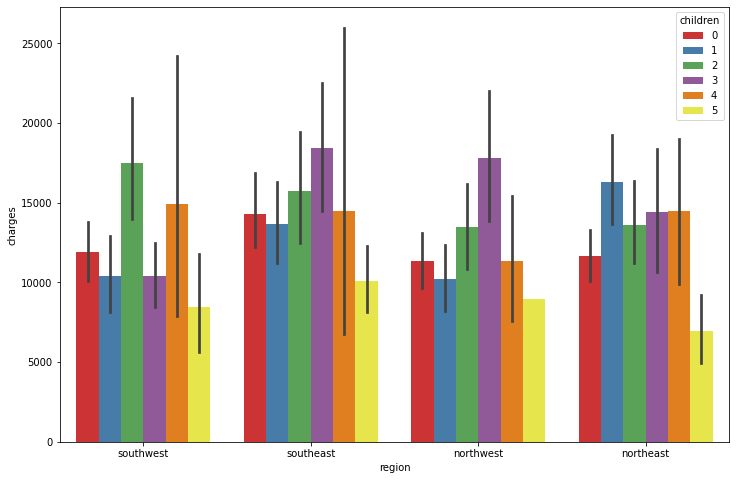

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

Bu barolardan görebileceğimiz gibi, sigara nedeniyle en yüksek ücretler hala Güneydoğu'da, ancak en düşük olanlar Kuzeydoğu'da. Güneybatı'daki insanlar genellikle Kuzeydoğu'daki insanlardan daha fazla sigara içiyor, ancak Kuzeydoğu'daki insanlar genel olarak Güneybatı ve Kuzeybatı'ya göre cinsiyete göre daha yüksek ücret alıyor. Ve çocuklu insanlar da genel olarak daha yüksek tıbbi maliyetlere sahip olma eğilimindedir.


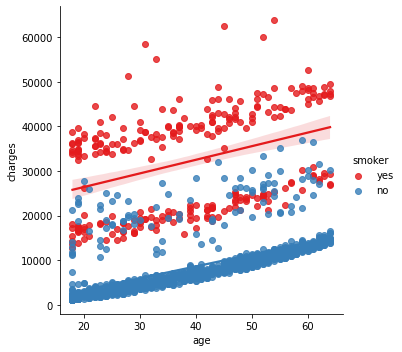

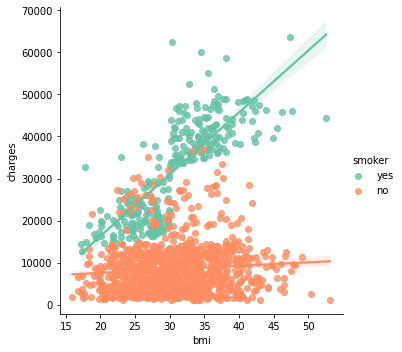

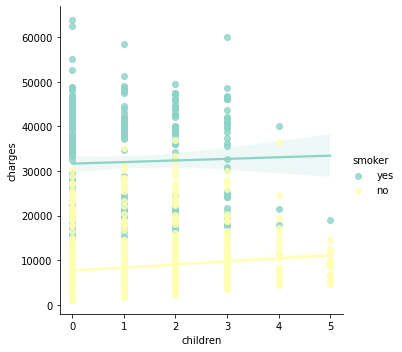

In [ ]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1') # veri setindeki age ve charges kolonlarını birbirine bağlı olarak gösteriyoruz
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2') # bmi ve charges kolonlarını birbirine bağlı olarak gösteriyoruz
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3') # children ve charges kolonları 

Maliyetler yaş, vücut ağırlığı ve çocuklarla birlikte artsa da, sigaranın tıbbi maliyetler üzerinde en yüksek etkisi vardır. Ayrıca çocuk sahibi olan kişiler genellikle daha az sigara içerler ki bu aşağıdaki keman planlarında da görülmektedir.

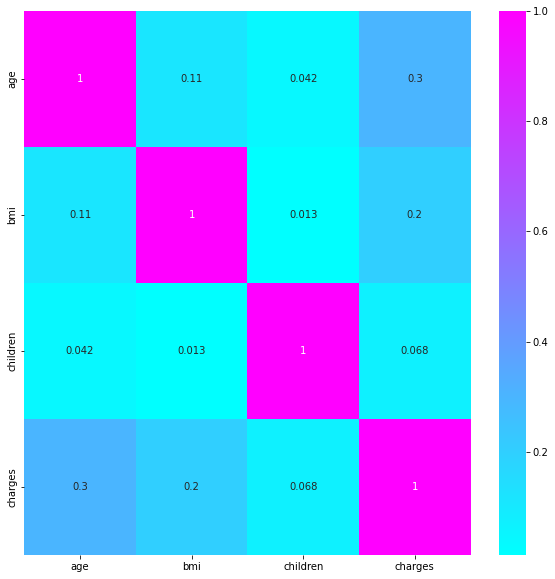

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 10)) 
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

# Feature scaling

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [ ]:
ct = make_column_transformer((
    StandardScaler(),["age","bmi","children"]),(OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])   
)

In [ ]:
X = df.drop("charges",axis=1) # charges'i sildik
y = df["charges"] 

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
ct.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [ ]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


LinearRegression, 
DecisionTreeRegressor,
KNeighborsRegressor,
SVR,
random_forest


In [ ]:
model_param = {
    'LinearRegression':{
        'model' : LinearRegression(),
        'param' : {}
    },
  
    'DecisionTreeRegressor':{
        'model':DecisionTreeRegressor(),
        'param':{
            'criterion': ['mse', 'friedman_mse', 'mae']
        }
    },
    'KNeighborsRegressor':{
        'model': KNeighborsRegressor(),
        'param':{
            'n_neighbors':np.arange(3,50,5)
        }
    },
    'SVR':{
        'model': SVR(),
        'param': {
            'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'C':np.arange(1,100,5)
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'param' : {
            'criterion': ['mse','mae'],
            'n_estimators': np.arange(1000,3000,100)
        }
    },
    
    
    
}

MAE, MSE, R2

In [54]:
import warnings
warnings.filterwarnings('ignore')

scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X_train_normal,y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_,
        
    })

In [ ]:
#print(scores)
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,LinearRegression,0.732971,{}
1,DecisionTreeRegressor,0.706927,{'criterion': 'friedman_mse'}
2,KNeighborsRegressor,0.753616,{'n_neighbors': 5}
3,SVR,0.556230,"{'C': 100, 'kernel': 'linear'}"
4,random_forest,0.829246,"{'criterion': 'mse', 'n_estimators': 1200}"
